# Tutorial: Recrystallization and Phase Transition Using Cellular Automata and Monte Carlo

## Arman Afshar, Shahrokh Shahi,  D'Arcy Wentworth Roper V
 
  
   
  
  
  
  
  
  
  

## 1. Introduction

The objective of this project is to present discrete computational models capable of simulating continuous physical phenomena. Our interest lies in tow important problem in material science, namely Recrystallization and phase transition of metalic materials. Recrystallization is a process by which deformed grains in poly crystalline materials are replaced by a new set of defects-free grains that nucleate and grow until the original grains have been entirely consumed. Recrystallization is usually accompanied by a reduction in the strength and hardness of a material and a simultaneous increase in the ductility. In this project, a Cellular Automata code is developed in Python to study the kinetics of recrystallization in two dimensions. The code will be capable of capturing nucleation, growth and slowing of grains. The model maps the microstructure onto a discrete square lattice, with each square having two states of either crystallized or not crystallized. A transformation rule is then applied to a random cell, and based on the state of cell and its neighbors the switching probability is calculated.

While seem very powerful for modeling recrystallization phenomenon, celluar automata is incapable of capturing temperature induced phase transition in these systems, hence requiring an alternative approach. Here we picked a kinetic monte carlo algorithm, which although may seem similar to cellular automata in the sense of general flow of the algorithm, its inherenet enegy dependent probabilistic nature make it suitable for phase transition. Phase transition happens in crystalline materials as a response to temperature, where in low temperatures the single phase crystalline structure is the most stable state, while in high temperatures the nucleation and mixing of a secondary phase would be the most stable case. Accurately capturing this phenomenon turned out to be a daunting task if one chooses to pick a continuous description, as it requires heavy perturbation analysis, but with an appropriate choice of a discrete model we will show in this model that this phase transition can be captured.     

The structure of this notebook is naturally divided in two sections, as it entail two different models. First, we start with the celluar automata model for recrystallization, then we move to the more advanced technique of Monte Carlo for capturing phase transition. Theoretical and mathematical background of each section is presented first, followed by Python code implementation.

## 2. Cellular Automota for Recrystallization 
### 2.1. Material Science Background 
The recrystallization process is accomplished by heating the material to temperatures above that of crystallization. This process is utilized in the annealing of steel, to eliminate all the effects of strain hardening such as heavy plastic deformation produced during cold working. 
When temperature is raised, the new, stress-free gains nucleate and grow inside the old deformed grains and also at the grain boundaries. This replaces the distorted grains produced by strain hardening. The metal’s mechanical properties revert back to their original, more ductile and weaker state.
The temperature above which the process occurs is not constant and is largely dependent on amount of time, steel composition, and amount of cold work. The more strain hardening, the lower the recrystallization temperature and the smaller the new grain sizes. A minimum of between two and twenty percent cold work is required for recrystallization to occur. Recrystallization temperature is typically one-third to one-half the melting point (in degrees Kelvin), and raises the atomic mobility, which results in recrystallization. 
The recrystallization results in lower hardness and strength properties of the material, in addition to increased ductility. It might be an undesirable byproduct of another processing step.
Various applications include decreasing strength and hardness levels, increasing ductility, allowing recovery process by removal or reduction of cold-working effects, increasing equiaxed ferrite grains formed from elongated grains
This process is widely used in metal processing such as annealing of stamped parts in cold-rolled steel, and with forged parts to prepare them for subsequent operations like cold forming or machining. The purpose of this work is to present a framework, based on Ising model of magnets, to simulate this process.


### 2.2 Basics of cellular automata 
Cellular automata are algorithms that describe the discrete spatial and temporal evolution of complex systems by applying local (or sometimes long-range) deterministic or probabilistic transformation rules to the cells of a regular (or non-regular) lattice. Space is defined on a regular array of lattice points that can be regarded as the nodes of a finite difference field [1]. The lattice maps the elementary system entities that are regarded as relevant to the model under investigation. The individual lattice points can represent continuum volume units, atomic particles, lattice defects, or colors depending on the underlying model. The state of each lattice point is characterized in terms of a set of generalized state variables [2]. These could be dimensionless numbers, particle densities, lattice defect quantities, crystal orientation, particle velocity, blood pressure, animal species, or any other quantity the model requires. The actual values of these state variables are defined at each of the individual lattice points. Each point assumes one out of a finite set of possible discrete states. The opening state of the automaton, which can be derived from experiment (for instance from a micro-texture experiment) or theory (for instance from finite element simulations), is defined by mapping the initial distribution of the values of the chosen state variables onto the lattice.
The dynamical evolution of the automaton takes place through the application of deterministic or probabilistic transformation rules (also referred to as switching rules) that act on the state of each lattice point. These rules determine the state of a lattice point as a function of its previous state and the state of the neighboring sites. The number, arrangement, and range of the neighbor sites used by the transformation rule for calculating a state switch determine the range of the interaction and the local shape of the areas that evolve. Cellular automata work in discrete time steps. After each time interval, the values of the state variables are updated for all lattice points, mapping the new (or unchanged) values assigned to them through the transformation rule.
Owing to these features, cellular automata provide a discrete method of simulating the evolution of complex dynamical systems that contain large numbers of similar components on the basis of their local (or long-range) interactions. Cellular automata do not have restrictions in the type of elementary entities or transformation rules employed. They can map such different situations as the distribution of the values of state variables in a simple finite difference simulation, the colors in a blending algorithm, the elements of fuzzy sets, or elementary growth and decay processes of cells. For instance, the Pascal triangle, which can be used to calculate higher-order binominal coefficients or the Fibonacci numbers, can be regarded as a one-dimensional cellular automaton in which the value that is assigned to each site of a regular triangular lattice is calculated through the summation of the two numbers above it. In this case, the entities of the automaton are dimensionless integer numbers and the transformation rule is a summation.
The local interaction of neighboring lattice sites in a cellular automaton is specified through a set of transformation (switching) rules. Although the original automata were designed with deterministic transformation rules, probabilistic transformations are conceivable as well. The value of an arbitrary state variable assigned to a particular lattice site at a time ($t_0+\Delta t$) is determined by its present state ($t_0$) (or its last few states $t_0$, $t_0-\Delta t$, etc.) and the state of its neighbors (1–4). 
Considering the last two time steps for the evolution of a one-dimensional cellular automaton, this can be put formally by writing 

\begin{equation}
\xi_j^{t_0+\Delta t} = f(\xi_{j-1}^{t_0-\Delta t},\xi_j^{t_0-\Delta t},
                         \xi_{j+1}^{t_0-\Delta t},\xi_{j}^{t_0},\xi_{j+1}^{t_0})
\end{equation}


where $\xi_{j}^{t_0}$ indicates the value of the variable at a time $t_0$ at the node $j$. The positions $j+1$ and $j-1$ indicate the nodes in the immediate neighborhood of position $j$ (for one dimension). The function $f$ specifies the set of transformation rules, for instance such as provided by standard discrete finite difference algorithms.
If the state of the node depends only on its nearest neighbors (NN), the array is referred to as von Neumann neighboring. If both the NN and the next nearest neighbors (NNN) determine the ensuing state of the node, the array is called Moore neighboring. The computer implementation of these neighborhoods is presented below:


First, we import all the required Python libraries, including the scientific computing and plotting ones:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import argparse
from copy import deepcopy
from __future__ import print_function

Then we move to constructing a class that defines the lattice. Since the structure is an object, we go beyond just defining the geometry and also include the associated vairables of each spin of the lattice. The most important variable of each site is its state, which could be either crystallized or recrystallized, presented by either 0 or 1. Another important method of this class is the **flip_spin** that enables switching 0 to 1 for each site. In addition to visualization methods, this class also includes definition of both Von Newmann and Moore neighborhood of each site. 

In [2]:
class CubicIsingLattice:
    '''
    Main Method Usage:
        lat = CubicIsingLattice(3) will initialize a 3x3 lattice of spins
        lat.size()                       the total number of spins on the lattice
        lat.spins()                      all spin states 
        lat.spin_mag()                   magnitude of the spins (assumed to be the same) 
        lat.spin(ispin)                  spin ispin state
        lat.nside()                      number of spins per dimension 
        lat.shape()                      shape of latice (default: [lat.nside(),lat.nside()]) 
        lat.nb_list()                    neighbour list 
        lat.flip_spin(ispin)             to change spin state of ispin
    '''

    def __init__(self,spins_per_dim,ndim=2,spin_mag=1.0):

        # save input quantities
        self._spins_per_dim = spins_per_dim # number of spins along each dimension of the cubic lattice
        self._ndim     = ndim               # number of dimensions
        self._spin_mag = spin_mag           # magnitude of a single spin (like mass)
        self._nb_per_dim = 2                # 2 neighbours per dimension on a cubic lattice

        # save calculated quantities
        self._shape = [spins_per_dim]*ndim  # default: (spins_per_dim,spins_per_dim)
        self._nspin = spins_per_dim**ndim   # total number of spins

        # initialize all spins to be pointing up
        self._spins = np.ones(self._shape,dtype=int) # initialize cubic lattice of spins
        
        # allocate and initialize neighbor list to establish the topology of the lattice
        self._nb_list = np.zeros([self._nspin,self._nb_per_dim*self._ndim],dtype=int)
        self._nb_list_extended = np.zeros([self._nspin,self._nb_per_dim*self._ndim*2],dtype=int)
        self._nb_list_extended_double = np.zeros([self._nspin,self._nb_per_dim*self._ndim*2+16],dtype=int)
        
        for ispin in range(self._nspin): # calculate and save the neighbours of each spin
            self._nb_list[ispin,:] = self.neighbours(ispin) 
            self._nb_list_extended[ispin,:] = self.neighbours_extended(ispin)
            self._nb_list_extended_double[ispin,:] = self.neighbours_extended_double(ispin)            

    def __str__(self):
        # allow lattice to be printed
        return str(self._spins)
    
    
    # accessor methods

    def ndim(self):
        return self._ndim

    def size(self):
        return self._nspin

    def nside(self):
        return self._spins_per_dim

    def spin_mag(self):
        return self._spin_mag

    def shape(self):
        return self._shape[:] 
        # return a copy to deter external modification

    def spins(self,copy=True):
        if copy:
            return self._spins.copy()
        else:
            return self._spins
        
    def spin(self,ispin):
        spin_idx = self.multi_idx(ispin)
        return self._spins[spin_idx]

    def nb_list(self,copy=True):
        if copy:
            return self._nb_list.copy()
        else:
            return self._nb_list

    def nb_list_extended(self,copy=True):
        if copy:
            return self._nb_list_extended.copy()
        else:
            return self._nb_list_extended

    def nb_list_extended_double(self,copy=True):
        if copy:
            return self._nb_list_extended_double.copy()
        else:
            return self._nb_list_extended_double

    def linear_idx(self,tuple_idx):
        # locate the linear index of a spin on the lattice: this method takes a 
        # multi-dimensional index and returns a single integer that labels the selected spin

        # guards
        out_lower_bound = np.where(tuple_idx<0)
        out_upper_bound = np.where(tuple_idx>=self.nside())
        
        ispin = np.ravel_multi_index(tuple_idx,self.shape())
        return ispin

    def multi_idx(self,ispin):
        # locate the multi-dimensional index of a spin on the lattice: 
        # this method takes a index and returns a multi-dimentional index
        
        if ispin >= self.size() or ispin<0: # guard against misuse
            raise IndexError("linear spin index %d is out of bounds."%ispin)

        return np.unravel_index(ispin,self.shape())


    def flip_spin(self,ispin):
        # flip spin ispin and return the change in total magnetization
        dmag = self.mag_change(ispin)    # change of total magnetization after flip
        spin_idx = self.multi_idx(ispin) # find the spin to flip
        self._spins[spin_idx] *= -1      # flip the spin
        return dmag


    # begin I/O methods
    
    def append_frame(self,filename):
        fhandle = open(filename,'a')
        fhandle.write("%d\n"%self.size())
        for irow in range(self.nside()):
            row_text = " ".join(["%2d"%spin for spin in self._spins[irow]])
            fhandle.write(row_text+"\n")
        fhandle.close()
    
    def visualize(self,ax,txt=''):
        # draw the lattice on a matplotlib axes object ax
        if self._ndim != 2:
            raise NotImplementedError("visualization only implemented for 2D lattice")

        # draw spins
        ax.pcolormesh(self.spins().T,vmin=-self._spin_mag,vmax=self._spin_mag,edgecolor=(1.0, 1.0, 1.0, 0.3))

        # set ticks to spin centers
        ax.set_xticks(np.arange(self.nside())+0.5)
        ax.set_yticks(np.arange(self.nside())+0.5)
        
        # rename ticks
        ax.set_xticklabels(np.arange(self.nside()))
        ax.set_yticklabels(np.arange(self.nside()))
        ax.axis("equal")
        ax.text(0.5,-0.5, txt, horizontalalignment='center')

    def neighbours(self,ispin):
        # return a list of indices pointing to the neighbours of spin ispin
        spin_idx    = self.multi_idx(ispin)
        neighb_list = np.zeros(self._nb_per_dim*self.ndim(),dtype=int)
    
        # LEFT
        x_minus =spin_idx[0]-1
        if  x_minus<0:
            x_minus=self._shape[0]-1 
        elif x_minus>self._shape[0]-1:
            x_minus=0

        # RIGHT
        x_plus  =spin_idx[0]+1
        if  x_plus<0:
            x_plus=self._shape[0]-1
        elif x_plus>self._shape[0]-1:
            x_plus=0

        # BOTTOM
        y_minus =spin_idx[1]-1
        if  y_minus<0:
            y_minus=self._shape[0]-1
        elif y_minus>self._shape[0]-1:
            y_minus=0

        # TOP
        y_plus  =spin_idx[1]+1 
        if  y_plus<0:
            y_plus=self._shape[0]-1
        elif y_plus>self._shape[0]-1:
            y_plus=0

        neighb_list[0]=self.linear_idx((x_minus,spin_idx[1]))
        neighb_list[1]=self.linear_idx((x_plus,spin_idx[1]))
        neighb_list[2]=self.linear_idx((spin_idx[0],y_minus))
        neighb_list[3]=self.linear_idx((spin_idx[0],y_plus))

        return neighb_list

    
    def neighbours_extended(self,ispin):
        # return a list of indices pointing to the neighbours of spin ispin
        spin_idx    = self.multi_idx(ispin)
        neighb_list = np.zeros(self._nb_per_dim*self.ndim()*2,dtype=int)
   
        # LEFT
        x_minus =spin_idx[0]-1
        if  x_minus<0:
            x_minus=self._shape[0]-1 
        elif x_minus>self._shape[0]-1:
            x_minus=0

        # RIGHT
        x_plus  =spin_idx[0]+1
        if  x_plus<0:
            x_plus=self._shape[0]-1
        elif x_plus>self._shape[0]-1:
            x_plus=0

        # BOTTOM
        y_minus =spin_idx[1]-1
        if  y_minus<0:
            y_minus=self._shape[0]-1
        elif y_minus>self._shape[0]-1:
            y_minus=0

        # TOP
        y_plus  =spin_idx[1]+1 
        if  y_plus<0:
            y_plus=self._shape[0]-1
        elif y_plus>self._shape[0]-1:
            y_plus=0

        neighb_list[0]=self.linear_idx((x_minus,spin_idx[1]))
        neighb_list[1]=self.linear_idx((x_plus,spin_idx[1]))
        neighb_list[2]=self.linear_idx((spin_idx[0],y_minus))
        neighb_list[3]=self.linear_idx((spin_idx[0],y_plus))
        neighb_list[4]=self.linear_idx((x_minus,y_minus))
        neighb_list[5]=self.linear_idx((x_minus,y_plus))
        neighb_list[6]=self.linear_idx((x_plus,y_plus))
        neighb_list[7]=self.linear_idx((x_plus,y_minus))

        return neighb_list

    
    def neighbours_extended_double(self,ispin):
        # return a list of indices pointing to the neighbours of spin ispin
        spin_idx    = self.multi_idx(ispin)
        neighb_list = np.zeros(24,dtype=int)

        # LEFT
        x_minus =spin_idx[0]-1
        if  x_minus<0:
            x_minus=self._shape[0]-1 
        elif x_minus>self._shape[0]-1:
            x_minus=0

        x_minus2=x_minus-1;
        if  x_minus2<0:
            x_minus2=self._shape[0]-1 
        elif x_minus2>self._shape[0]-1:
            x_minus2=0

        # RIGHT
        x_plus  =spin_idx[0]+1
        if  x_plus<0:
            x_plus=self._shape[0]-1
        elif x_plus>self._shape[0]-1:
            x_plus=0

        x_plus2=x_plus+1
        if  x_plus2<0:
            x_plus2=self._shape[0]-1
        elif x_plus2>self._shape[0]-1:
            x_plus2=0

        # BOTTOM
        y_minus =spin_idx[1]-1
        if  y_minus<0:
            y_minus=self._shape[0]-1
        elif y_minus>self._shape[0]-1:
            y_minus=0

        y_minus2=y_minus-1
        if  y_minus2<0:
            y_minus2=self._shape[0]-1
        elif y_minus2>self._shape[0]-1:
            y_minus2=0

        # TOP
        y_plus  =spin_idx[1]+1 
        if  y_plus<0:
            y_plus=self._shape[0]-1
        elif y_plus>self._shape[0]-1:
            y_plus=0

        y_plus2=y_plus+1
        if  y_plus2<0:
            y_plus2=self._shape[0]-1
        elif y_plus2>self._shape[0]-1:
            y_plus2=0

        neighb_list[0]=self.linear_idx((x_minus,spin_idx[1]))
        neighb_list[1]=self.linear_idx((x_plus,spin_idx[1]))
        neighb_list[2]=self.linear_idx((spin_idx[0],y_minus))
        neighb_list[3]=self.linear_idx((spin_idx[0],y_plus))
        neighb_list[4]=self.linear_idx((x_minus,y_minus))
        neighb_list[5]=self.linear_idx((x_minus,y_plus))
        neighb_list[6]=self.linear_idx((x_plus,y_plus))
        neighb_list[7]=self.linear_idx((x_plus,y_minus))

        neighb_list[8]=self.linear_idx((x_minus2,spin_idx[1]))
        neighb_list[9]=self.linear_idx((x_minus2,y_minus))
        neighb_list[10]=self.linear_idx((x_minus2,y_minus2))
        neighb_list[11]=self.linear_idx((x_minus2,y_plus))
        neighb_list[12]=self.linear_idx((x_minus2,y_plus2))

        neighb_list[13]=self.linear_idx((x_plus2,spin_idx[1]))
        neighb_list[14]=self.linear_idx((x_plus2,y_minus))
        neighb_list[15]=self.linear_idx((x_plus2,y_minus2))
        neighb_list[16]=self.linear_idx((x_plus2,y_plus))
        neighb_list[17]=self.linear_idx((x_plus2,y_plus2))

        neighb_list[18]=self.linear_idx((spin_idx[0],y_minus2))
        neighb_list[19]=self.linear_idx((x_minus,y_minus2))
        neighb_list[20]=self.linear_idx((x_plus,y_minus2))


        neighb_list[21]=self.linear_idx((spin_idx[0],y_plus2))
        neighb_list[22]=self.linear_idx((x_minus,y_plus2))
        neighb_list[23]=self.linear_idx((x_plus,y_plus2))

        return neighb_list
    

    def magnetization(self):
        # total magnetization of the lattice
        tot_mag = 0.0       
        tot_mag=np.sum(self.spins()*self.spin_mag())
        return tot_mag


    def mag_change(self,ispin):
        # change in magnetization if ispin is flipped
        dmag     = 0.0
        dmag     = 2*self.spin(ispin)*self.spin_mag()
        return dmag
    

Having discussed the implementation, now we arrive at presenting the neighborhoods. It should be noted that both neighborhoods are used in the simulations of this work and their effect is studied.

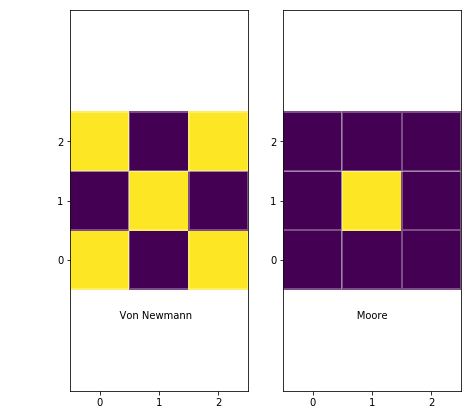

In [3]:
lat = CubicIsingLattice(3)
fig,ax = plt.subplots(1,2,figsize=(7,7))

spaceString = '                                    ';
neighbours = [1, 3, 5, 7]
for nb in neighbours:
    lat.flip_spin(nb)
    
lat.visualize(ax[0], spaceString+'Von Newmann')     

neighbours = [0, 2, 6, 8]
for nb in neighbours:
    lat.flip_spin(nb)
    
lat.visualize(ax[1], spaceString+'  Moore')


Owing to the discretization of space, the type of neighboring affects the local transformation rates and the evolving morphologies (3). 
Even for very simple automata there exists an enormous variety of possible transformation rules. For instance, for a one-dimensional cellular automaton (Boolean, von Neumann neighboring), where each node can have one of two possible ground states, say $\xi_j=0$ or $\xi_j=1$, the transformation rule assumes the form
\begin{equation}
    \xi_j^{t_0+\Delta t} = f(\xi_{j-1}^{t_0},\xi_j^{t_0},\xi_{j+1}^{t_0})
\end{equation}
This simple Boolean configuration defines 28 possible transformation rules.
If the state of a node is determined by the sum of the neighbor site values, the model is referred to as a totalistic cellular automaton. If the state of a node has a separate dependence on the state itself and on the sum of the values taken by the variables of the neighbors, the model is referred as an outer totalistic cellular automaton.
These introductory remarks show that the cellular automaton concept is defined in a very general and versatile way. Cellular automata can be regarded as a generalization of discrete calculation methods (1, 2). Their flexibility is due to the fact that, in addition to the use of crisp mathematical expressions as variables and discretized differential equations as transformation rules, automata can incorporate practically any kind of element or rule that is deemed relevant. Next section is devoted to developing an evolution rule that is approriate for the purpose of this work.

### 2.3. Application of Cellular Automata for recrystallization 
During a typical recrystalliztion process, three phenomena is distinctly observed:
1. nucleation of grains
2. growth of grains
3. the slowing of growth owing to the impingement of grains

In order to capture these, the following assumptions are made:
1. The geometry of the cells is assumed to be a two-dimensional square lattice
2. The number and the kind of states a cell can possess are two states per site: either recrystallized or not recrystallized
3. We considered each of the two-dimensional neighborhoods in previous Figures for the definition of the neighborhood of a cell.
4. The rules that determine the state of each cell in the next time step are also provided below. These rules govern nucleation of new grains, growth of grains, and the impingement of grains. 

At the beginning of the simulation, all sites were set to zero (not recrystallized) and then  embryo grain “embryos” were placed in the system by assigning non-zero values to randomly selected sites on the lattice. Defining the activity as the sum of recrystallized neighbors of the central site based on the defined neighborhood, a simple rule to describe growth: if activity is greater than one at time step $t_0$, then the central site would be considered recrystallized at time step $t_0 + \Delta t$ and take on the identity of the grain that extends into its neighborhood. Near impingement, when more than one grain might be growing into a neighborhood, a model for controlling the growth rate of the grains is required. In this study, we say that the growth happens not with a probability $P = 1$, but with some lower probability. The number of recrystallized sites within the 25-neighbor environment is denoted as $A_{25}$. If $A_{25} > 11$, then the probability $P$ of growth was reduced and a linear probabilistic model was used:
\begin{equation}
    P=\big( 1-\frac{\alpha A_{25}}{100} \big)
\end{equation}

Depiction of the 25 neighborhood is presented below:

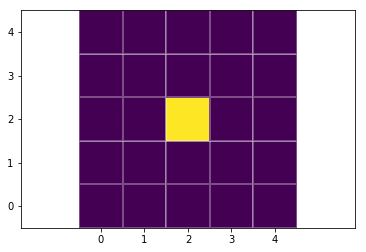

In [4]:
lat = CubicIsingLattice(5)
fig,ax = plt.subplots(1,1)

for nb in range(25):
    lat.flip_spin(nb)

lat.flip_spin(12)    
lat.visualize(ax)


It should be noted that in order to model the bulk of the material, i.e. remove the surface effect, a periodic boundary condition is also applied on the whole cell. With this method, any site on the edge also observes the image of the oppsoing edge. The following piece of code implements this aspect of the model:

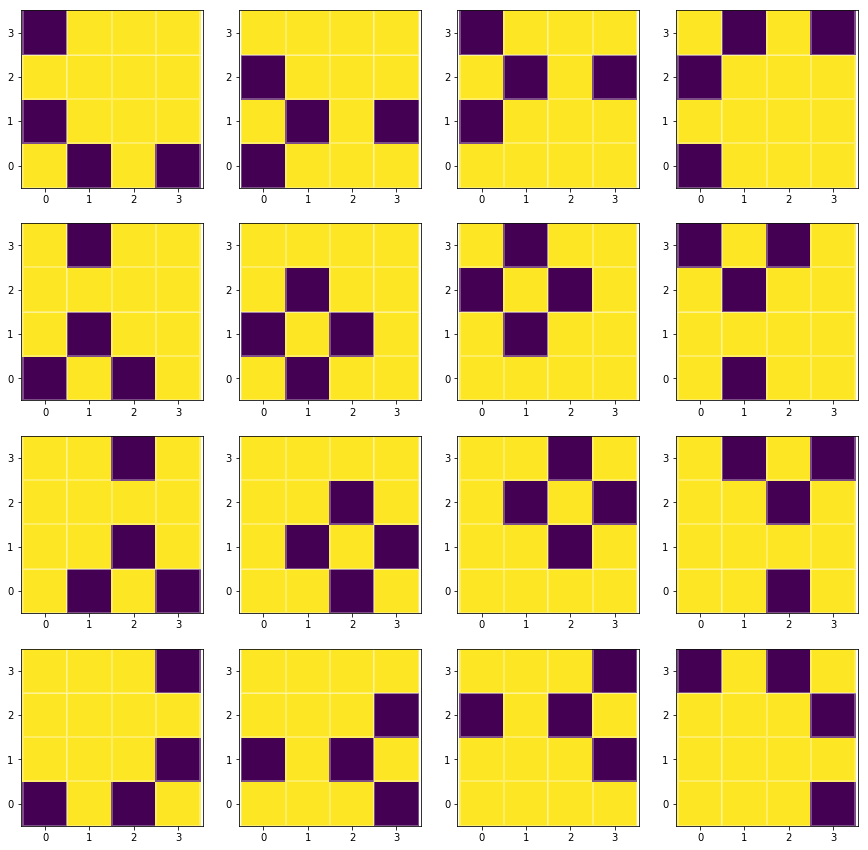

In [5]:
# for each spin, visualize its neighbours
lat = CubicIsingLattice(4)
fig,ax = plt.subplots(4,4,figsize=(15,15))

for ispin in range(lat.size()):

    # flip'em
    neighbours = lat.nb_list()[ispin]
    for nb in neighbours:
        lat.flip_spin(nb)

    # plot'em
    spin_idx = lat.multi_idx(ispin)
    ix,iy = spin_idx
    lat.visualize(ax[ix][iy])

    # flip'em back
    for nb in neighbours:
        lat.flip_spin(nb)

plt.show()

After defining the periodic boundary conditon on the edges of the lattice , we implement the following class which calculates the number of flipped neighborhood around each individual lattice site. This class is needed since the evoultion rule explained above depends on the number of flipped neighbors. 

In [6]:
class IsingHamiltonian:

    def __init__(self,J,lat):
        self._isingJ   = J  # OK to use one-letter variable once in constructor
        self._lat_ref = lat # keep a reference to an IsingLattice

    def isingJ(self):
        return self._isingJ

    def lattice(self,copy=True):
        if copy:
            return deepcopy(self._lat_ref)
        else:
            return self._lat_ref

    def compute_energy(self):      
        # calculating the total energy of the tracked ising lattice
        # note: the state of the spins (up/down) is stored in lattice.spins(), 
        # and the magnitude of the spins are stored separately in lattice.spin_mag()
        
        tot_energy = 0.0
        H          = 0.0
        for ii in range(self._lat_ref.size()):  # i-th spin
            for kk in range(self._lat_ref._nb_per_dim*self._lat_ref._ndim): 
                jj=self._lat_ref.nb_list()[ii][kk]  # j-th spin
                sisj=self._lat_ref.spin(ii)* self._lat_ref.spin(jj)*(self._lat_ref.spin_mag()**2)
                H   = H + sisj
        tot_energy = - self._isingJ*H/2.0       
   
        return tot_energy


    def compute_spin_energy(self,ispin):
        # calculate the energy associated with one spin
        energy = 0.0
        for kk in range(self._lat_ref._nb_per_dim*self._lat_ref._ndim):
            jj=self._lat_ref.nb_list()[ispin][kk]  
            sisj=self._lat_ref.spin(ispin)* self._lat_ref.spin(jj)*(self._lat_ref.spin_mag()**2)
            energy = energy -  self._isingJ*sisj

        return energy


Now we move the main block of the code which does the bulk of calculations. It is made of two nested loops, One loop over time and one interior loop that goes over the entire lattice, checking each indivdiual lattice site for its neighbors. Then state of each site is updated in the next time step based on the aforementioned evolution rules (which depends on the state of its neighbors at the previous step). This whole process is peformed many times till the final recrystallized configuration is obtained.  

In [7]:
def visualize(ax):
        # draw the lattice on a matplotlib axes object ax
        
        # draw spins
        ax.pcolormesh(lat.spins().T,vmin=-spin_mag,vmax=spin_mag)

        # set ticks to spin centers
        ax.set_xticks(np.arange(lat.nside())+0.5)
        ax.set_yticks(np.arange(lat.nside())+0.5)
        
        # rename ticks
        ax.set_xticklabels(np.arange(lat.nside()))
        ax.set_yticklabels(np.arange(lat.nside()))


# defining the main loop for cellular automota
# (this function will be returning an array of volume fraction values)
def ca_loop(
    spin_mag       ,
    isingJ         ,
    temperature    ,
    spins_per_side ,
    nsweep         ,
    ndump          ,
    seed           ,
    nbr_type
    ):

    beta = 1./temperature
    np.random.seed(seed)

    vol_frac_array =np.zeros((nsweep,1))
    
    # initialize the Ising model
    lat = CubicIsingLattice(spins_per_side,spin_mag=spin_mag)
    ham = IsingHamiltonian(isingJ,lat)
    
    print_fmt   = "{isweep:4d}  {energy:10.4f}  {Mperspin2:9.6f}"
    #print(" isweep   energy   M2 ")

    # initialize observables
    tot_energy  = ham.compute_energy()
    tot_mag     = lat.magnetization()
    m_per_spin2 = (tot_mag/lat.size())**2
    
    tot_energy_ini=tot_energy ; m_per_spin2_ini=m_per_spin2
    
    # some hard-coded control variables (left as is for further investigations)
    num_accept  = 0
    Ni=10.0 # number of initial recrystallized sites
    Nd=10.0 # number of adding new nucleations in each step


    # Initial nucleation
    for ini_c in range(int(Ni)):
        ispin=np.random.randint(lat.size())     
        lat.flip_spin(ispin)            

    total_crys=Ni  # total number of crystallized sites
    vol_frac = total_crys/lat.size()

    for isweep in range(nsweep):

        num_accept=0
        switch_list=np.zeros(lat.size())
        
        
        for ispin in range(lat.size()):            
            # Nucleation 
            if Nd/lat.size() > np.random.rand():  
                if lat.spin(ispin)==1:              
                    switch_list[ispin]=33 
                       
            # Growth
            spin_sum=0

            if  nbr_type=='Normal':      #normal 4 neighbors
                if lat.spin(ispin)==1: 
                    for jj in lat.nb_list()[ispin]:
                        spin_sum= spin_sum + lat.spin(jj)   ## sum of neighbors spin
                    if  spin_sum<4:        # it means atleast one is  already recrystallized    
                        switch_list[ispin]=33  # make it to the list            
                       
            
            elif  nbr_type=='Extended':  #extended 8 neighbors
                if lat.spin(ispin)==1: 
                    for jj in lat.nb_list_extended()[ispin]:
                        spin_sum= spin_sum + lat.spin(jj)   # sum of neighbors spin
                    if  spin_sum<8:     # it means if at least one is already recrystallized
                        if spin_sum>0:  # usuall
                            switch_list[ispin]=33 # make it to the list            
                              
                        else:   # impingment
                            if  np.random.rand()<(1+10*spin_sum):  # impingment factor:4 choose between 0 to 10
                                switch_list[ispin]=33 # make it to the list            
                                         
        for ispin in range(lat.size()):
            if switch_list[ispin]==33 and lat.spin(ispin)==1:
               lat.flip_spin(ispin)  # recrystallize the current ispin (make it -1)
               num_accept=num_accept+1  
        
        total_crys=total_crys+num_accept
        
        # Saving for plotting
        vol_frac = total_crys/lat.size()
        #vol_frac_array[isweep] =vol_frac
        vol_frac_array[isweep] =np.log(1/(1-vol_frac*0.99))

        # plotting
        if isweep%(ndump)==0:
            fig, ax = plt.subplots(1,1,figsize=(12,12))
            ax.set_title('STEP:'+str(isweep), fontsize=20)
            plt.rcParams.update({'font.size': 6})
            lat.visualize(ax)
            plt.show()
            print ("    Volume Fraction of Recrystallized Material (f) = ",vol_frac)
            print ()
            print ()
            
    return vol_frac_array  


### 2.4. Simulation results
Now we present results of the simulation for a 100 by 100 lattice, considering both neighborhoods. A plot of crystallized volume fraction vs time is also provided to quantitavely present the evolution. Starting with the von Neumann neighborhood, we have:

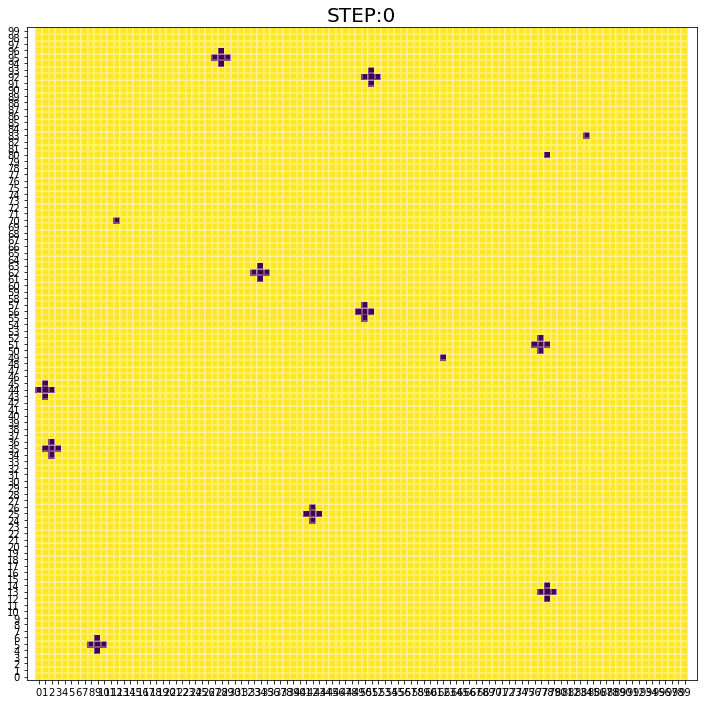

    Volume Fraction of Recrystallized Material (f) =  0.0054




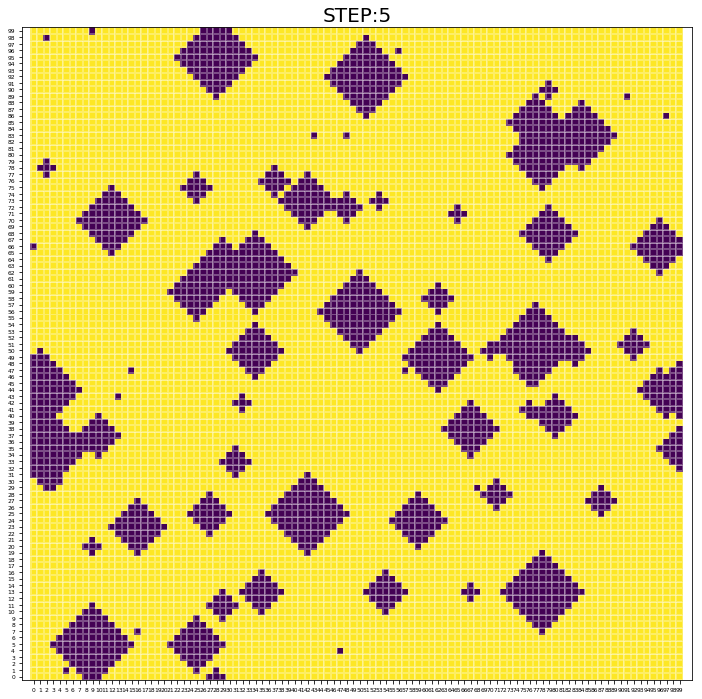

    Volume Fraction of Recrystallized Material (f) =  0.182




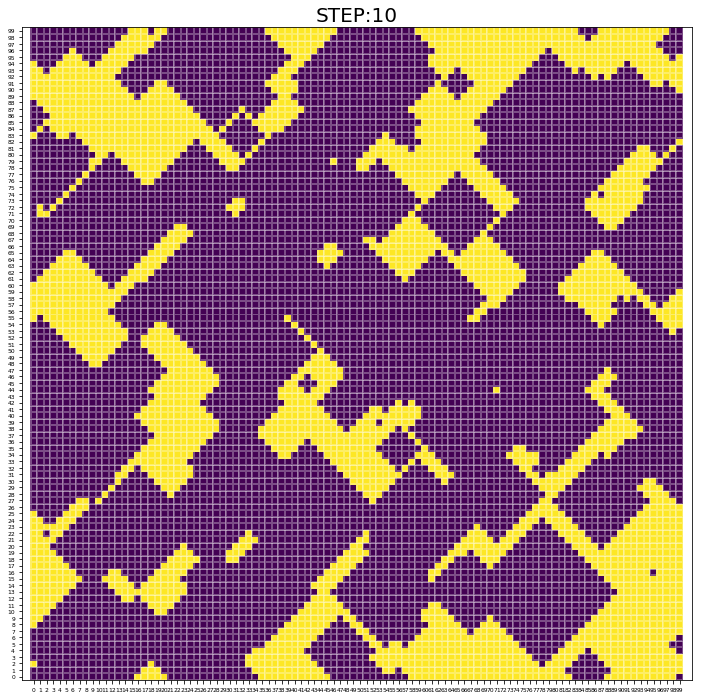

    Volume Fraction of Recrystallized Material (f) =  0.7017




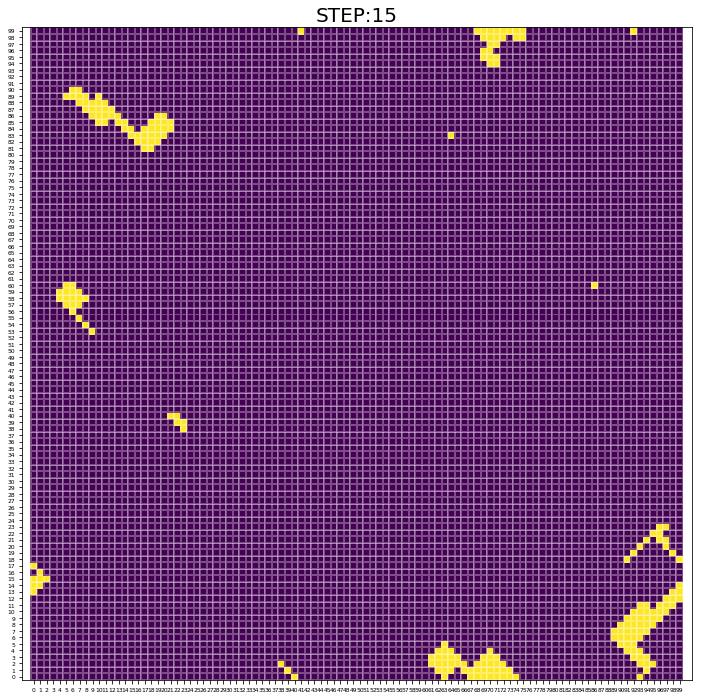

    Volume Fraction of Recrystallized Material (f) =  0.9777




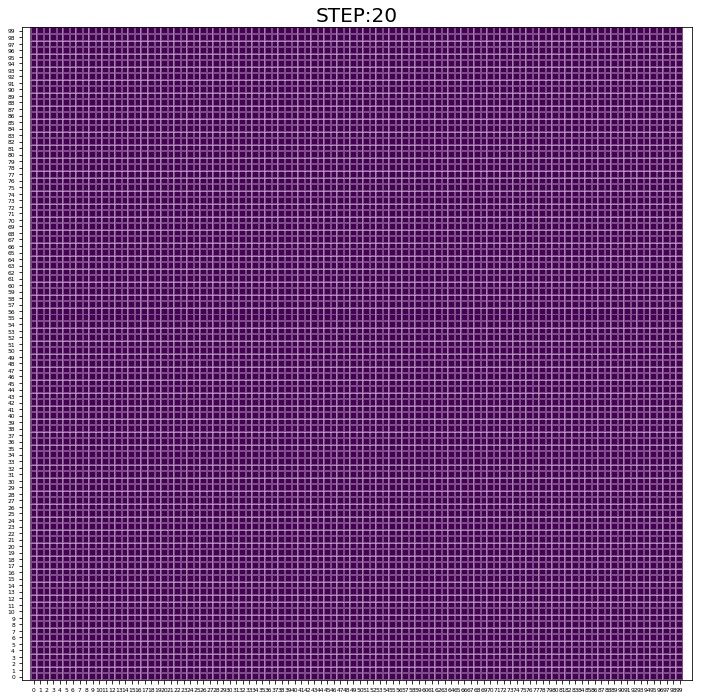

    Volume Fraction of Recrystallized Material (f) =  1.0




In [8]:
# Cellular Automata Main (I): Von Neumann Neighboring

# hard-coded inputs
# ==============================
ndump          = 5
spins_per_side = 100
beta           = 0.25
nsweep         = 25
seed           = 1
isingJ         = 1.0
spin_mag       = 1.0
nbr_type       = 'Normal'


# run cellular automota loops
# ==============================
vol_frac_array = ca_loop(
    spins_per_side = spins_per_side,
    temperature    = 1./beta,
    nsweep         = nsweep,
    ndump          = ndump,
    seed           = seed,
    isingJ         = isingJ,
    spin_mag       = spin_mag,
    nbr_type       = nbr_type
)



The following plot depicts the evolution of recrystallized volume fraction vs time. The famous exponential trend usually observed in the experiments is reproduced here.

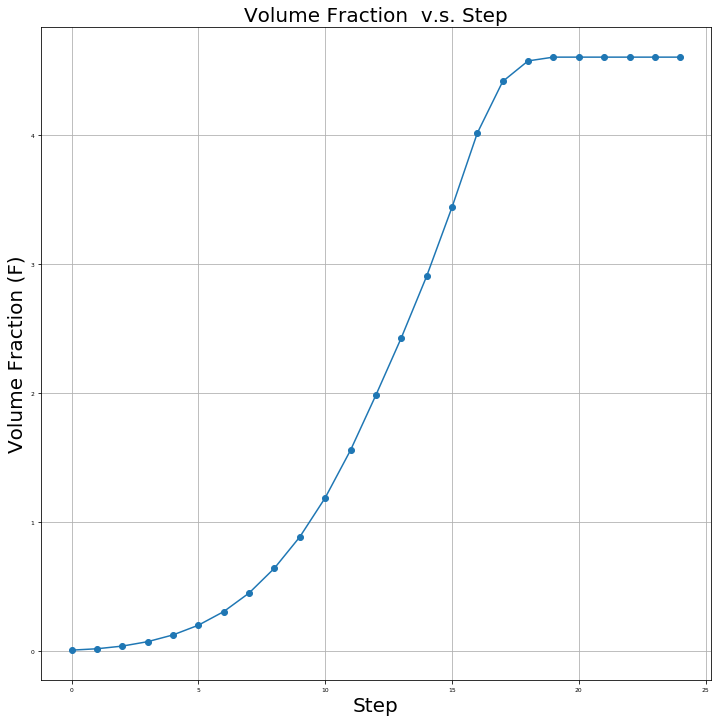

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
ax.set_title('Volume Fraction  v.s. Step', fontsize=20)
plt.plot(range(len(vol_frac_array)),vol_frac_array,'-o')
plt.xlabel('Step', fontsize=20)
plt.ylabel('Volume Fraction (F)', fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.grid()
plt.show()
plt.rcParams.update({'font.size': 6})

Performing the same simulation now for Moore neighborhood:

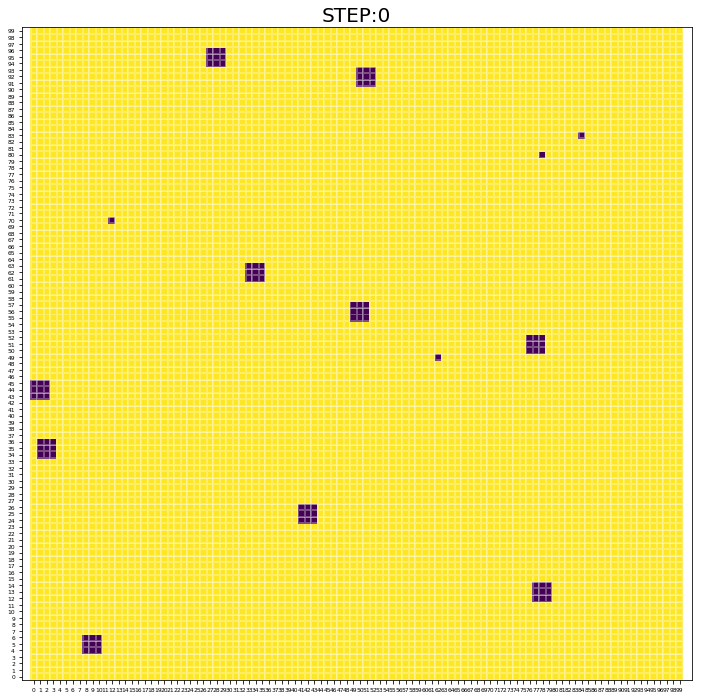

    Volume Fraction of Recrystallized Material (f) =  0.0094




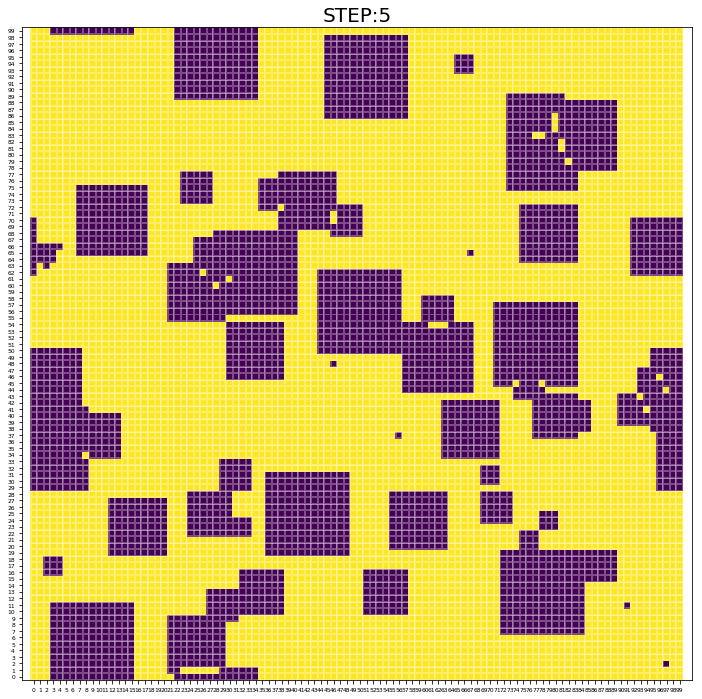

    Volume Fraction of Recrystallized Material (f) =  0.333




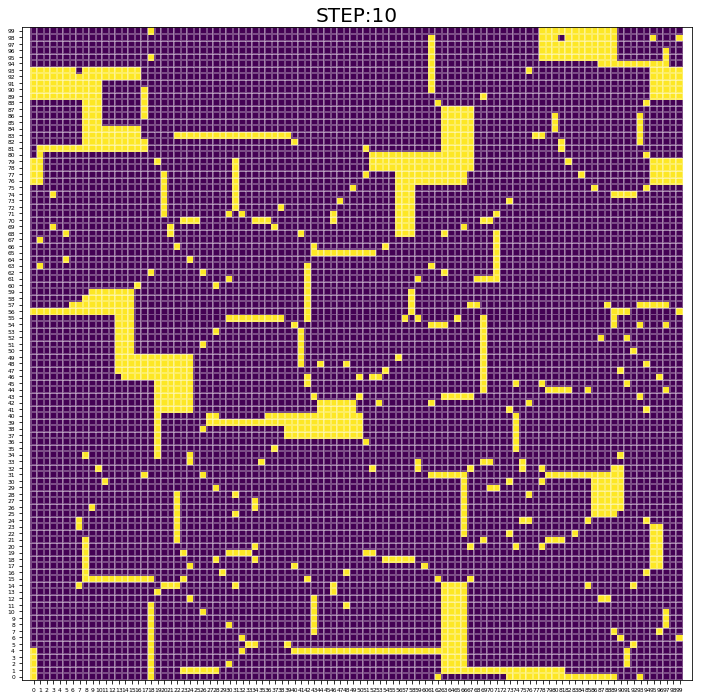

    Volume Fraction of Recrystallized Material (f) =  0.8808




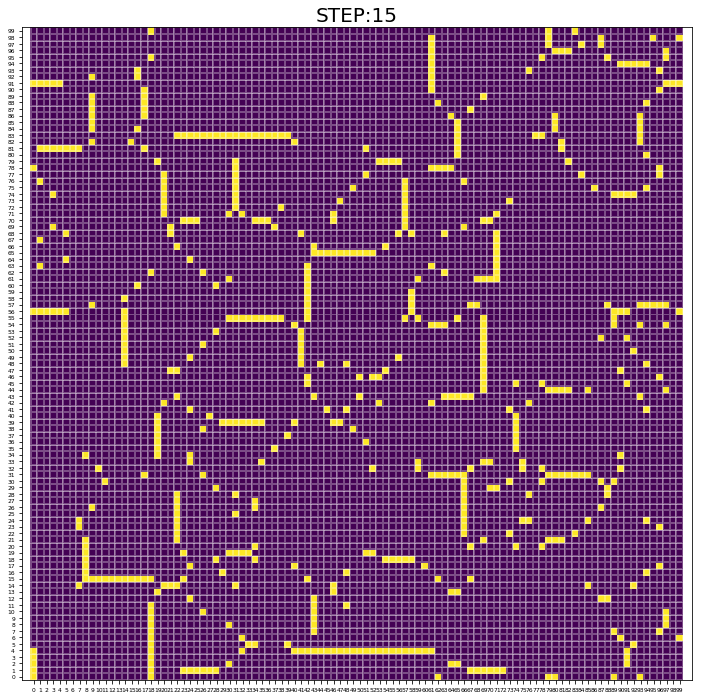

    Volume Fraction of Recrystallized Material (f) =  0.9399




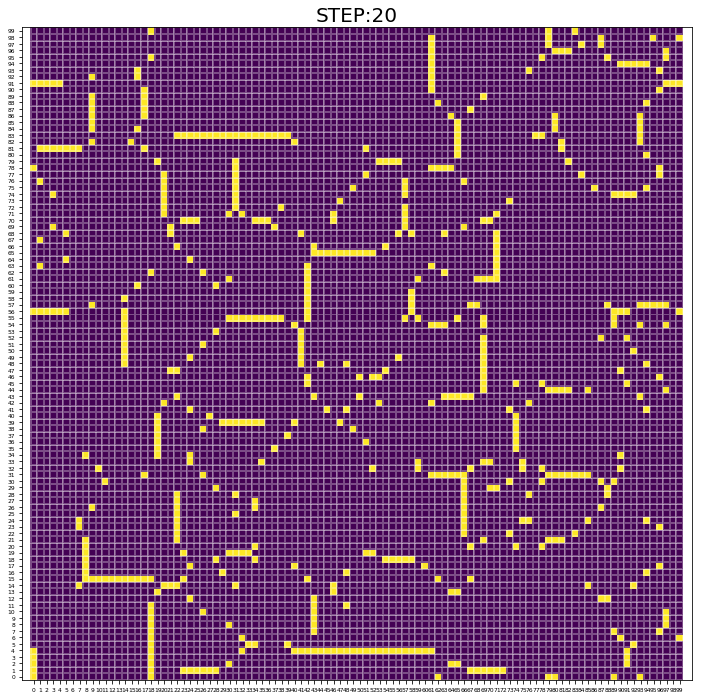

    Volume Fraction of Recrystallized Material (f) =  0.9402




In [10]:
# Cellular Automata Main (II): Moore Neighboring

nbr_type='Extended'


# start CA
# ==============================
vol_frac_array = ca_loop(
    spins_per_side = spins_per_side,
    temperature    = 1./beta,
    nsweep         = nsweep,
    ndump          = ndump,
    seed           = seed,
    isingJ         = isingJ,
    spin_mag       = spin_mag,
    nbr_type       = nbr_type
)

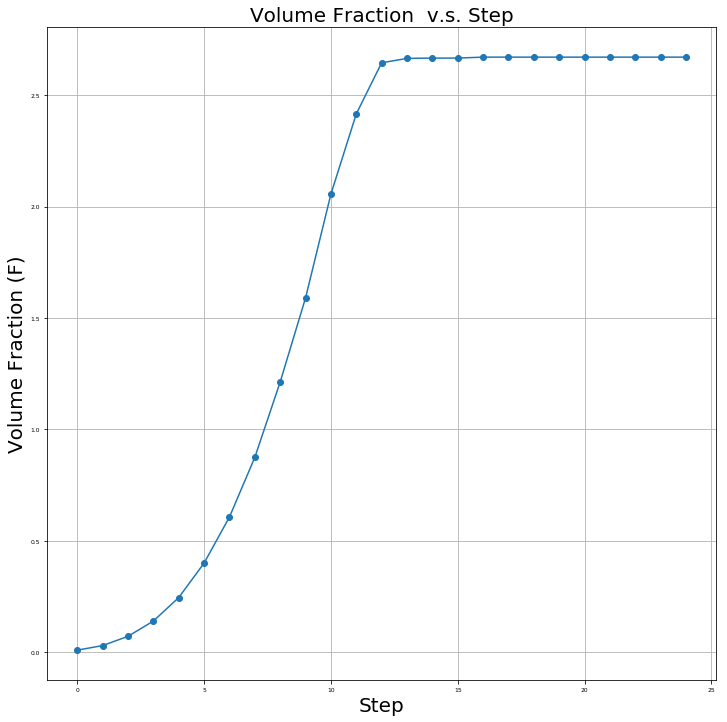

In [11]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
ax.set_title('Volume Fraction  v.s. Step', fontsize=20)
plt.plot(range(len(vol_frac_array)),vol_frac_array,'-o')
plt.xlabel('Step', fontsize=20)
plt.ylabel('Volume Fraction (F)', fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.grid()
plt.show()
plt.rcParams.update({'font.size': 6})

The interesting fact about comparing the two neighborhoods is that Von Neumann neighbood , the volume fraction goes to 1.0, i.e. fully filling the entire lattice, while the same does not happen in the Moore neighbood. This can be attributed to the impingment phenomena happening at later stage of the simulation.  

## 3. Monte Carlo for Phase Transition
Having discussed the celluar automata for recrystallization process, now we move to the Monte Carlo model for phase transition. We start our presentation by a material science background that explains why phase transition happens in materials, then we move the computational algorithm of the Monte Carlo approach. The implementation shares a lot of similarities with the cellular automata model, and hence we only present the points fundamentally different between two methods. 
### 3.1. Material Science Background
Derivation of the Monte Carlo probability rule depends on the Boltzmann distribution, so we naturally start our presentation from there. Boltzmann's distribution is a probability equation that describes the probability of each configurational state, based on an energy minimization. Boltzmann derived his equation from the Helmholtz free energy, written from both macroscopic and macroscopic perspective:
\begin{equation}
F=F(N,V,T)=U-TS=F(p_1,p_2,p_3,...)
                = F({p_j})
\end{equation}

where $N$, $V$, and $T$ are macroscopic quantities of number of particles, volume and temperature, while $p_j$ is the propabibility of  $jth$ configuration of the system. 

Looking at the free energy expression, one can intuitively observe the driving force for phase transition. At low temperatyre regime, only energy is important, hence favoring a single phase of material as this configuraiton has the lowest energy due to the neighbor interactions (interaction is a negative energy contribution in single phase so it lowers the energy). At high temperature regimes however, the entropy becomes dominant and favors a formation of a new  phase as two phases mixed together produces more combinations, a microscopic defintion of entropy. Surprisingly however, there is a critical temperature that separates the two behavior in a bifurcation manner. All systems at temperatures below this critical value are dominated by energy, while all systems above this critical temperature are dominated by entropy. We will show by our simulation how to evaluate this bifurcation temperature for a 2D model. 

Continuing the previous equation, the probability implies that the sum should be unity:

\begin{equation}
\sum\limits_{i} p_i=1
\end{equation}

 Now we have to represent the macroscopic quantities in terms of microscopic ones, i.e. 

\begin{equation}
U= \langle \epsilon \rangle = \sum\limits_{j} \epsilon_j p_j
\end{equation}
  
\begin{equation}
S=K \sum\limits_{j} p_j \ln p_j
\label{eq4}
\end{equation}

where  %epsilon_j$ is the energy of each configuration. Rest of this section is devoted to show how derivation of Monte carlo acceptance rule lies on the previous equaions. Trying to minimize the fee energy gives us

\begin{equation}
\widetilde{F}=F-\alpha(\sum\limits_{i} p_i-1)
\label{eq5}
\end{equation}

now we take derivative with respect to  $p_i$ to obtain the probabaility distribution of each configuration:

\begin{equation}
 \frac{\partial \widetilde{F}}{\partial p_i}=\frac{\partial }{\partial p_i}(\sum\limits_{j} \epsilon_j p_j +KT \sum\limits_{j} p_j \ln p_j-\alpha(\sum\limits_{i} p_i-1)  =0
\end{equation}

resulting in 

\begin{equation}
\epsilon_i+KT(\ln p_i +1)-\alpha=0
\end{equation}

or equivalently

 \begin{equation}
 p_i=e^{-\epsilon_i/{KT}}e^{\beta \alpha-1}
\end{equation}

enforcing constraint gives us the following relation:

\begin{equation}
 e^{\beta \alpha-1}=\frac{1}{\sum\limits_{i} e^{-\epsilon_i/{KT}}}  = \frac{1}{Q}
\end{equation}

which results in the following equation for probability of each configuration:

 \begin{equation}
 p_i= \frac{ {e^{-\epsilon_i/{KT}} } }  {Q}
\end{equation}

This is the proability rule we use for our evolution in the Monte Carlo method (more on this in the next section). Here $Q$ represents the partition function, a quantity that is very hard to estimate since it requires evaluation of all possible confiugrations, but the trick in the Monte Carlo method is that only relative probability matters and we can get rid of calculating this quantity!  

### 3.2. Basics of Monte Carlo
As mentioned in the previous section, the Monte Carlo algorithm is based on the idea that while we cannot know the actual probability of a state (since we cannot evaluate Q), we can be use the relative probability to create a list of configurations through configuration space that has the correct probability distribution. This list is called a trajectory through configuration space. The approach is to start a system at a configuration, then to make a trial move of the system to a new configuration, and to test, based on the probability of the new configuration relative to the starting configuration, whether the new configuration should be added to the trajectory or not. More specifically, suppose configuration $i$ has energy $E_i$. A trial is made to a new configuration $i + 1$ and then the energy in the new
configuration, $E_{i+1}$, is calculated. The decision of whether to add $i + 1$ to the trajectory is based
on the ratio of probabilities, $P_{i+1}/P_i$, which is equal to $exp(−\Delta E_{i,i+1}/kT)$, where $\Delta E_{i,i+1} = E_{i+1} − E_i$. As promised, the partition funciton $Q$ is also removed from the calculation.

The enery of each configuarion is also calculated based on the following nearest neighbor interaction:

\begin{equation}
E=-\frac{J}{2}\sum\limits_{i}\sum\limits_{j} s_i s_j
\end{equation}

where $s$ represent the state of each site in the lattice. For the parent phase, we are picking 0, and naturally we pick 1 for the new phase.  

### 3.3 Application of Monte Carlo Method to Phase transition

Similar to the cellular automata model, we begin by a lattice that starts in an all 0 configuraiton, meaning all the parent phase. Then moving in time, we flip random sites, calculate the energy of the new configuariotn and compare it with the previous configuraiton energy. Then based on this calcualted $\Delta E$, we accept or reject the rule baesd on the aformenetioned probability $exp(−\Delta E_{i,i+1}/kT)$. 

Based in this arguments, the flow of the code looks similar to the cellular automata model, with the exception of the probabailistic evolution rule. Another fundamental difference between two models is also the treatment of simulatine evoultion. While in celluar automata the evolution begins from the frist step of the simulation, here in Monte Carlo a transient period needs to be passed before we observe the final configuration of the lattice.



The following function calculates the energy of each configuration by looping over sites and estimating the nearest neighbors interaction. 

In [12]:
class McIsingHamiltonian:

    def __init__(self,J,lat):
        self._isingJ   = J  # OK to use one-letter variable once in constructor
        self._lat_ref = lat # keep a reference to an IsingLattice

    def isingJ(self):
        return self._isingJ


    def lattice(self,copy=True):
        if copy:
            return deepcopy(self._lat_ref)
        else:
            return self._lat_ref


    def compute_energy(self):
        #  calculate the total energy of the tracked ising lattice
        tot_energy = 0.0
        H          = 0.0
        for ii in range(self._lat_ref.size()):  
            for kk in range(self._lat_ref._nb_per_dim*self._lat_ref._ndim): 
                jj=self._lat_ref.nb_list()[ii][kk]  
                sisj=self._lat_ref.spin(ii)* self._lat_ref.spin(jj)*(self._lat_ref.spin_mag()**2)   
                H   = H + sisj
        tot_energy = - self._isingJ*H/2.0       
   
        return tot_energy


    def compute_spin_energy(self,ispin):
        # calculate the energy associated with one spin
        energy = 0.0
        for kk in range(self._lat_ref._nb_per_dim*self._lat_ref._ndim):
            jj=self._lat_ref.nb_list()[ispin][kk]  ###jth spin
            sisj=self._lat_ref.spin(ispin)* self._lat_ref.spin(jj)*(self._lat_ref.spin_mag()**2)    
            energy = energy -  self._isingJ*sisj

        return energy

Customary in Monte Carlo simulation is calcualting means and standard deviation of the energy plots to perfrom a quick statistical analysis of the ouput data. This analysis can help us distiguish the transient period, which we should remove from the output. These simple functions are provided below, along with the main loop of the algorithm which is similar to Cellular Automata approach.

In [13]:
# plotting function
def Plot_fn(file_name):
        trace = np.loadtxt( file_name )
        fig, ax = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]}, figsize=(8,8))
        
        ax[0].set_xlabel("Step",   fontsize=14)
        ax[0].set_ylabel("Total Energy of the Lattice" , fontsize=14)
        ax[1].set_xlabel("Freq.", fontsize=14)
        ax[1].get_yaxis().tick_right()

        # plot trace
        ax[0].plot(trace,c='black')

        # plot histogram
        wgt,bins,patches = ax[1].hist(trace, bins=30, normed=True
                                    , fc='gray', alpha=0.5, orientation='horizontal')
        
        # moving averge to obtain bin centers
        bins = np.array( [(bins[i-1]+bins[i])/2. for i in range(1,len(bins))] )
        def _gauss1d(x,mu,sig):
            norm  = 1./np.sqrt(2.*sig*sig*np.pi)
            gauss = np.exp(-(x-mu)*(x-mu)/(2*sig*sig)) 
            return norm*gauss
        
        Mymean = np.mean(trace)
        Mystd  = np.std(trace)
        ax[1].plot(_gauss1d(bins,Mymean,Mystd),bins,lw=2,c="black")
        ax[1].set_xticks([0,0.025,.05])

        # overlay statistics
        for myax in ax:
            myax.axhline( Mymean, c='b', lw=2, label="mean = %1.4f" % Mymean )
            myax.axhline( Mymean+Mystd, ls="--", c="gray", lw=2, label="std = %1.2f" % Mystd )
            myax.axhline( Mymean-Mystd, ls="--", c="gray", lw=2 )
        
        ax[0].legend(loc='best')

        plt.show()
        auto_time = corr(trace,Mymean,Mystd)
        stderr    = error(trace,Mystd,auto_time)
        return auto_time
    
def corr(trace,mymean,mystd):
    num   = len(trace)
    n=num
    R=[0]* n
    for k in range(1,n):
        temp_sum1=0
        for t in range(0,n-k):
            temp_sum1 += (trace[t]-mymean)*(trace[t+k]-mymean)

        R[k]=(1./ ((n-k)*mystd**2)) * temp_sum1
        if R[k]<0:
            break
    
    eff_R = R[1:k]
    auto_time = 1+2*sum(eff_R)
    return auto_time

def error(trace,mystd,Auto_time):
    N_eff = len(trace)/Auto_time
    stderr_wrong = mystd/np.sqrt(len(trace))
    stderr = mystd/np.sqrt(N_eff)
    # calculate standard error
    return stderr

# defining the main loop for Monte Carlo
# (perform Monte Carlo simulation of the Ising model)
def mc_loop(
    spin_mag       ,
    isingJ         ,
    temperature    ,
    spins_per_side ,
    nsweep         ,
    ndump          ,
    seed           ,
    traj_file      ,
    scalar_file    ,
    restart        = False,
    ):
    
    beta = 1./temperature
    np.random.seed(seed)

    energy_array =np.zeros((nsweep,1))
    magnetization_array =np.zeros((nsweep,1))
    
    # initialize the Ising model
    lat = CubicIsingLattice(spins_per_side,spin_mag=spin_mag)
    ham = McIsingHamiltonian(isingJ,lat)
    
    if restart: # check traj_file
        assert os.path.exists(traj_file), "restart file %s not found" % traj_file
        lat.load_frame(traj_file)

    if not restart:
        # destroy!
        with open(scalar_file,'w') as fhandle:
            fhandle.write('# energy    M^2/spin\n')

    print_fmt   = "{isweep:4d}  {energy:10.4f}  {Mperspin2:9.6f}"

    # initialize observables
    tot_energy  = ham.compute_energy()
    tot_mag     = lat.magnetization()
    m_per_spin2 = (tot_mag/lat.size())**2
    
    tot_energy_ini=tot_energy ; m_per_spin2_ini=m_per_spin2
    
    # some hard-coded control variables (left as is for further investigations)
    num_accept  = 0
    num_reject  = 0
    warm_up_time = 5 # warm up period in sweeps
    for isweep in range(nsweep):

        # report and dump configuration
        if isweep%ndump==0:
            # print(print_fmt.format(**{'isweep':isweep,'energy':tot_energy,'Mperspin2':m_per_spin2}))
            if isweep==0 and restart:
                continue # do not duplicate last configuration
            lat.append_frame(traj_file)

        # save scalar data
        with open(scalar_file,'a') as fhandle:
            fhandle.write('{energy:10.4f}  {Mperspin2:9.6f}\n'.format(**{'energy':tot_energy,'Mperspin2':m_per_spin2}))

        for imove in range(lat.size()):
            spin_sum=0
            DE_old=0 ; DE_new=0;
            
            # select a random spin to flip
            ispin = np.random.randint(lat.size())
            nbr   = lat.nb_list()[ispin]    # Neighbors of the flipped spin
            for jj in lat.nb_list()[ispin]:
                DE_old  = DE_old + ham.compute_spin_energy(jj)
                spin_sum= spin_sum + lat.spin(jj)  # sum of neighbors spin: used for heat bath algorithm
  
            # monte carlo flipping
            lat.flip_spin(ispin) 

            for jj in lat.nb_list()[ispin]:
                DE_new  = DE_new + ham.compute_spin_energy(jj)            
                
            energy_change2 = DE_new-DE_old
            
            acc_rate = np.exp(-beta*energy_change2)  # monte carlo

            # accept/reject
            if np.random.rand()<acc_rate:
                # update observables and flip spin
                num_accept += 1
                dmag        = lat.mag_change(ispin)
            else:
                lat.flip_spin(ispin)      # flip to the original value
                energy_change2 = 0        # no change in energy
                dmag           = 0        # no change in magnetization
                num_reject += 1

            tot_mag     = tot_mag    + dmag
            tot_energy  = tot_energy +  energy_change2   


        # averaging
        m_per_spin2 = (tot_mag/lat.size())**2

        # saving for plotting
        energy_array[isweep]        = tot_energy
        magnetization_array[isweep] = m_per_spin2
    
        # plotting
        if isweep%(ndump)==0:   
            fig, ax = plt.subplots(1,1,figsize=(12,12))
            ax.set_title('STEP:'+str(isweep), fontsize=20)
            plt.rcParams.update({'font.size': 6})
            lat.visualize(ax)
            plt.show()

    # correction of the zero point
    energy_array[0]         =   tot_energy_ini
    magnetization_array[0]  =   m_per_spin2_ini

    index = range(warm_up_time)
    equilibriated_energy        = np.delete(energy_array,index)
    equilibriated_magnetization = np.delete(magnetization_array,index)
    
    # plotting
    np.savetxt('Energy.txt',equilibriated_energy,newline='\n')

### 3.4. Simulation Results

This section is devoted to present the results of the simulation for capturing phase transition. We have run multiple simulations to pinpoint the critical temperature, which turns out to be around 2.3(non-dimensionalized) for our model. Therefore, we present two simulations, one at $T=1$ below the critical temperature and one at $T=3$ above the critical temperature. 

Starting with the low temperature simulation, we have the following results:

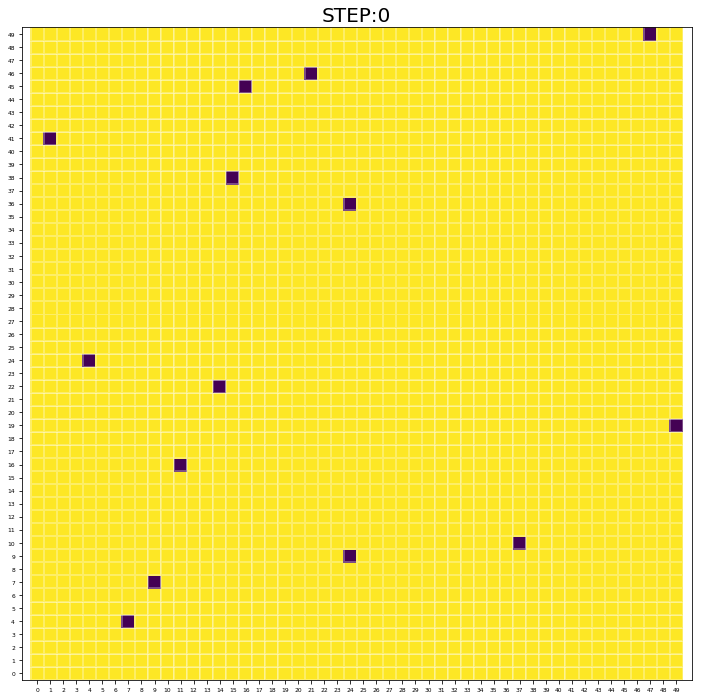

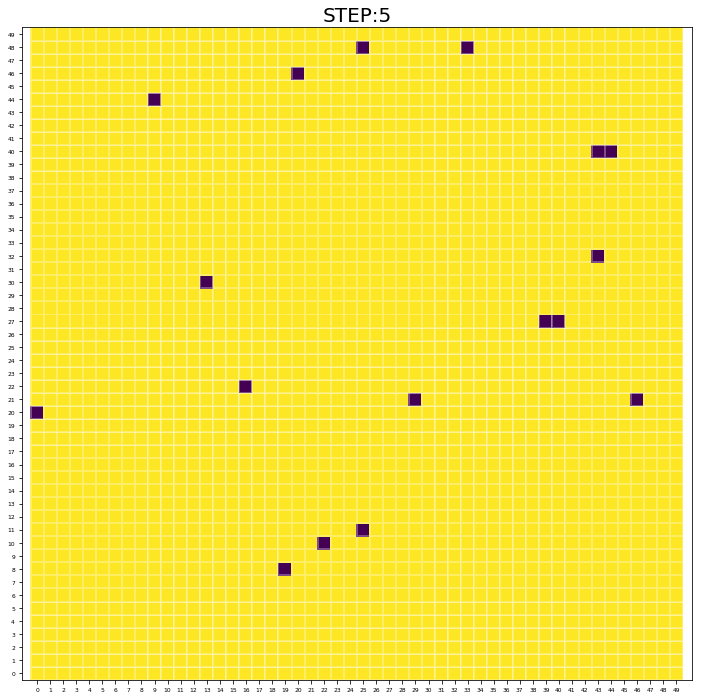

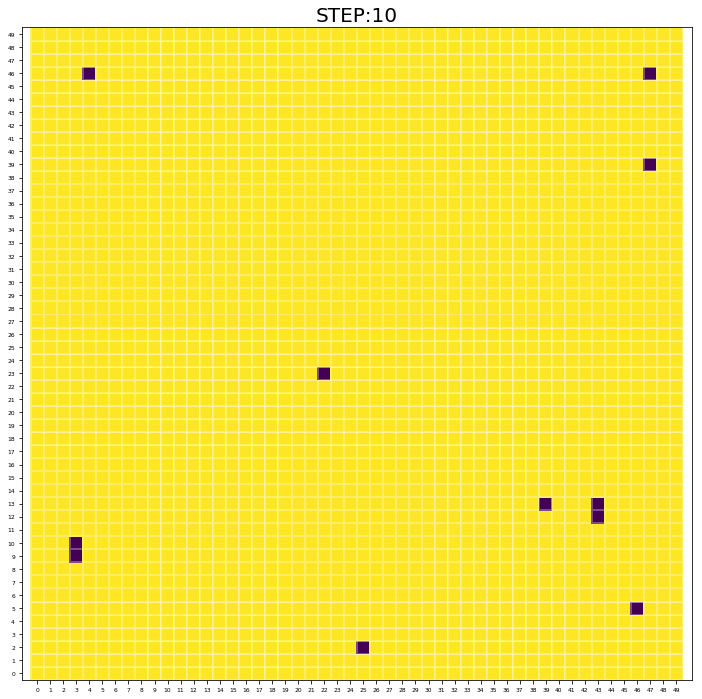

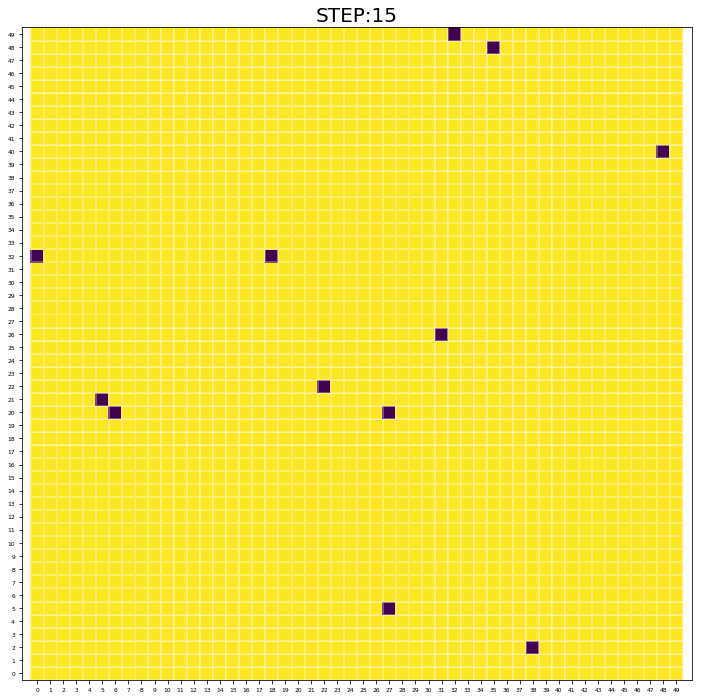

In [14]:
# Data inputs (Hard-coded)
# ==============================
spins_per_side = 50
beta           = 0.25
nsweep         = 20
restart        = False
seed           = 1
isingJ         = 1.0
spin_mag       = 1.0
temperature    = 1.5
ndump          = 5
traj_file      = 'traj.dat'
scalar_file    = 'scalar.dat'



# start MC
# ==============================
mc_loop(
    spins_per_side = spins_per_side,
    temperature    = temperature,
    nsweep         = nsweep,
    ndump          = ndump,
    restart        = restart,
    seed           = seed,
    traj_file      = traj_file,
    scalar_file    = scalar_file,
    isingJ         = isingJ,
    spin_mag       = spin_mag
)

As it is observed from the plots, very few flips are accepted at low temperatures, a fact that is expected since in this regime energy is dominant, which favors parent-parent interaction. The evolution of total lattice energy vs time is also provided below:

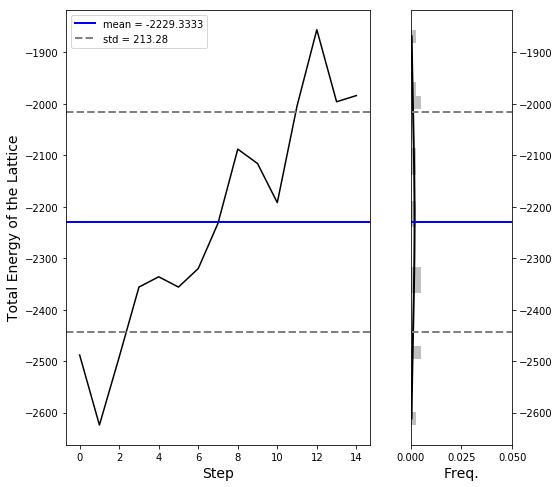

In [18]:
plt.rcParams.update({'font.size': 10})
auto_time_energy = Plot_fn('Energy.txt')
plt.rcParams.update({'font.size': 6})

Now we run another simulation above the critical temperature (2.3), using the following code:

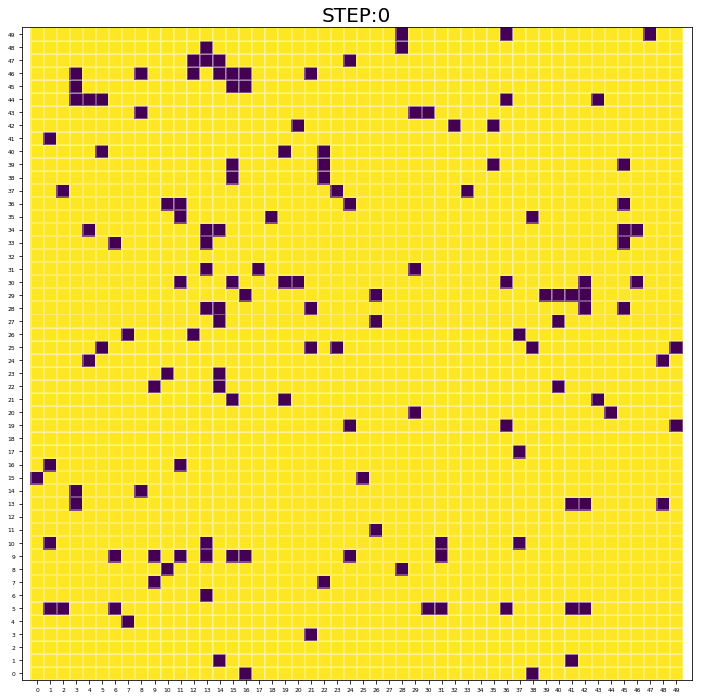

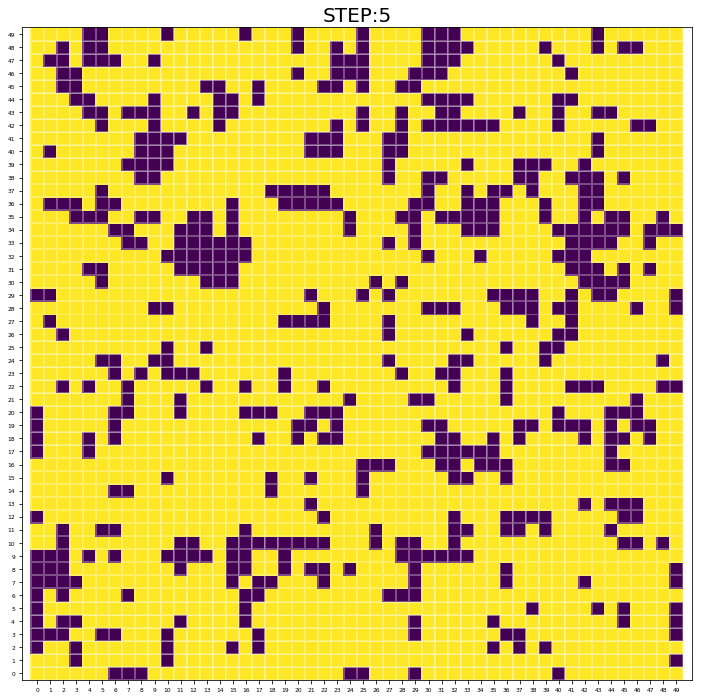

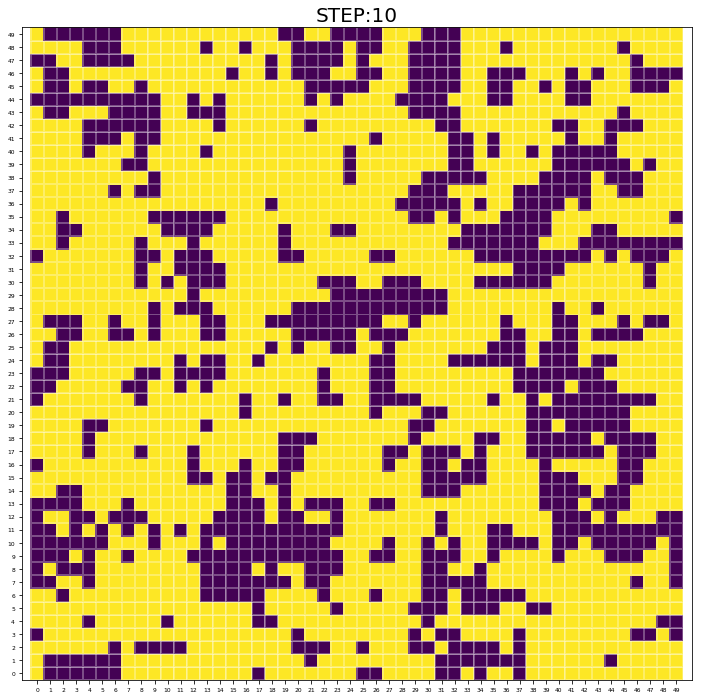

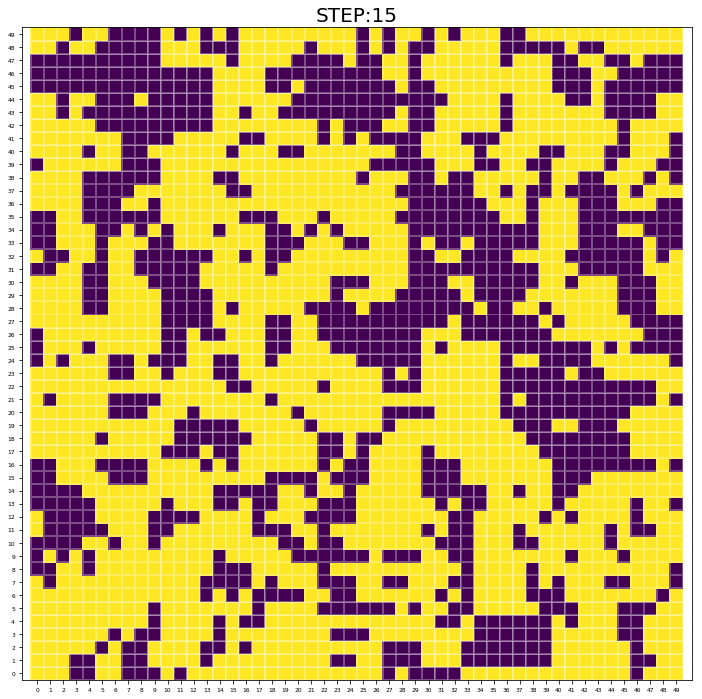

In [16]:
temperature    = 3.0

# start MC
# ==============================
mc_loop(
    spins_per_side = spins_per_side,
    temperature    = temperature,
    nsweep         = nsweep,
    ndump          = ndump,
    restart        = restart,
    seed           = seed,
    traj_file      = traj_file,
    scalar_file    = scalar_file,
    isingJ         = isingJ,
    spin_mag       = spin_mag
)

Here it is observed that many more flips are accepted as mixing two phases together increases entropy, a quantity that is dominant over energy in this regime. A perfect mixed state of 50% parent and 50% new phase posseses the maximum entropy. One could also at look the following energy plot and observe that it has a higher average energy compared to the low temperature case, as it is expected since a higher entropy configuration also has higher energy.

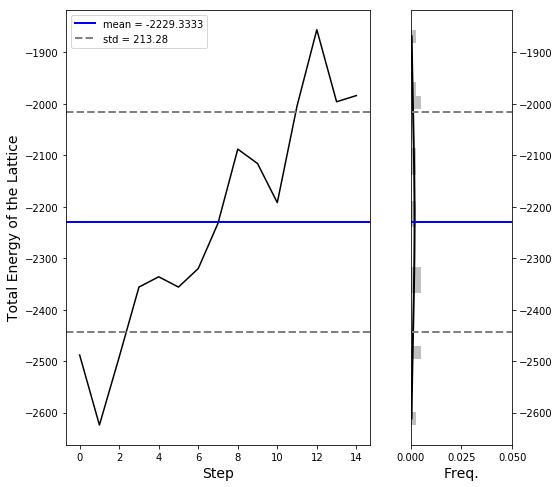

In [17]:
plt.rcParams.update({'font.size': 10})
auto_time_energy = Plot_fn('Energy.txt')

## 4. References

1. Aspray, William, and Arthur Burks. Papers of John Von Neumann on computing and computer theory, Vol 12. MIT Press, 1986.
2. Wolfram, Stephen. Theory and applications of cellular automata. Vol. 1. Singapore: World scientific, 1986.
3. Wolfram, Stephen. "Statistical mechanics of cellular automata." Reviews of modern physics 55.3 (1983): 601.
4. Minsky, Marvin L. Computation: finite and infinite machines. Prentice-Hall, Inc., 1967.
5. Conway, John Horton. Regular algebra and finite machines. Courier Corporation, 2012.
6. Johnson, William A., and Robert F. Mehl. "Reaction kinetics in processes of nucleation and growth." Trans. Aime 135.8 (1939): 396-415.
7. Avrami, Melvin. "Granulation, phase change, and microstructure kinetics of phase change. III." The Journal of chemical physics 9.2 (1941): 177-184.
8. Kolmogorov, A. N. "On the statistics of the crystallization process in metals." Bull Akad Sci. USSR, Class Sci, Math Nat 1 (1937): 355-359.

